In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolours
import matplotlib.ticker as mticker
import numpy as np
from datetime import timedelta

import heliopy.data.helios as helios
import astropy.units as u
import astropy.constants as const

import sys
sys.path.append('library')
import axisformat
from derived import calc_derived

Read in data
---

In [2]:
import urllib
urllib.request.urlretrieve('https://zenodo.org/record/1186586/files/structure_times.csv', 'blob_times.csv')
blob_times = pd.read_csv('blob_times.csv', parse_dates=['Start', 'End'])
blob_times['Duration'] = (blob_times['End'] -
                          blob_times['Start']).apply(lambda x: x.total_seconds())

blob_times['r'] = np.nan

Set up variables to save
---

In [3]:
variables = ['n_p', 'Tp_par', 'Tp_perp', 'Tp', '|B|',
             'Tani', 'p_mag', 'p_th',
             'p_tot_ave', 'p_tot_min', 'p_tot_max',
            'vp_x']
for new_col in variables:
    blob_times[new_col] = np.nan
    blob_times[new_col + '_before'] = np.nan
    blob_times[new_col + '_after'] = np.nan

Loop through each blob and compute stuff
---

In [4]:
for index, row in blob_times.iterrows():
    print('{}/{} {} --> {}'.format(index + 1, blob_times.shape[0], row['Start'], row['End']))
    probe = str(int(row['Probe']))
    dt = timedelta(seconds=3.5 * 40.5)
    padding = timedelta(seconds=1)

    # Get data before, inside, and after blob
    try:
        before = helios.corefit(probe, row['Start'] - dt, row['Start'] + padding)
        inside = helios.corefit(probe, row['Start'] + padding, row['End'] - padding)
        after = helios.corefit(probe, row['End'] + padding, row['End'] + dt)
    except ValueError as err:
        print(str(err))
        continue
    if inside.shape[0] < 4:
        raise ValueError('Not enough data points')
    before = calc_derived(before)
    inside = calc_derived(inside)
    after = calc_derived(after)

    blob_times.loc[index, 'r'] = inside['r_sun'].mean()
    for var in variables:
        blob_times.loc[index, var] = inside[var].mean()
        blob_times.loc[index, var + '_before'] = before[var].mean()
        blob_times.loc[index, var + '_after'] = after[var].mean()
        blob_times.loc[index, var + '_outside'] = (after[var].mean() + before[var].mean()) / 2

1/140 1975-02-23 19:06:37 --> 1975-02-23 19:16:04
2/140 1975-02-23 21:49:58 --> 1975-02-23 22:00:46
3/140 1975-02-24 20:46:19 --> 1975-02-24 20:58:28
4/140 1975-02-24 21:34:55 --> 1975-02-24 21:47:04
5/140 1975-02-24 21:55:10 --> 1975-02-24 22:01:55
6/140 1975-03-07 04:09:53 --> 1975-03-07 04:20:00
7/140 1975-03-07 14:19:30 --> 1975-03-07 14:42:27
8/140 1975-03-07 19:27:18 --> 1975-03-07 19:38:47
9/140 1975-03-07 21:56:29 --> 1975-03-07 22:26:11
10/140 1975-03-18 21:12:49 --> 1975-03-18 21:17:33
11/140 1975-03-19 03:29:32 --> 1975-03-19 03:34:16
12/140 1975-03-19 04:22:12 --> 1975-03-19 04:28:57
13/140 1975-03-19 05:00:40 --> 1975-03-19 05:05:24
14/140 1975-03-25 02:22:51 --> 1975-03-25 02:41:45
15/140 1975-03-25 03:46:33 --> 1975-03-25 03:50:36
16/140 1975-03-25 18:58:49 --> 1975-03-25 19:09:37
17/140 1975-03-25 19:27:52 --> 1975-03-25 19:40:42
18/140 1975-03-26 00:49:39 --> 1975-03-26 01:18:00
19/140 1975-03-26 01:30:09 --> 1975-03-26 01:51:05
20/140 1975-03-26 02:31:35 --> 1975-03-2

100.0% 204800 / 203496




112/140 1980-05-13 00:45:20 --> 1980-05-13 00:50:03
113/140 1980-05-13 15:26:44 --> 1980-05-13 15:38:53
114/140 1980-05-14 03:54:35 --> 1980-05-14 05:02:46


100.0% 180224 / 179525




115/140 1980-05-14 10:30:48 --> 1980-05-14 10:47:00
116/140 1980-05-14 12:40:25 --> 1980-05-14 12:56:37
117/140 1980-05-15 15:03:29 --> 1980-05-15 15:12:55


100.0% 147456 / 145536




118/140 1980-05-25 12:45:22 --> 1980-05-25 12:56:50


100.0% 188416 / 184468




119/140 1980-05-26 08:53:23 --> 1980-05-26 09:04:51


100.0% 114688 / 111275




120/140 1980-05-31 08:22:09 --> 1980-05-31 08:32:16


100.0% 270336 / 269898




121/140 1980-06-02 23:10:44 --> 1980-06-02 23:18:50


100.0% 212992 / 206687




122/140 1980-06-03 17:02:24 --> 1980-06-03 17:07:08


100.0% 237568 / 233101




123/140 1980-06-03 17:34:08 --> 1980-06-03 17:44:15
124/140 1980-06-04 08:55:49 --> 1980-06-04 09:09:59


100.0% 237568 / 231040




125/140 1980-06-09 04:26:43 --> 1980-06-09 04:47:39


100.0% 294912 / 287007




126/140 1980-06-09 10:34:04 --> 1980-06-09 10:38:48
127/140 1980-06-09 11:06:28 --> 1980-06-09 11:11:12
128/140 1980-06-09 11:29:25 --> 1980-06-09 11:40:13
129/140 1980-06-09 15:02:23 --> 1980-06-09 15:06:26
130/140 1980-06-09 15:15:12 --> 1980-06-09 15:18:35
131/140 1980-06-10 12:34:40 --> 1980-06-10 12:50:12


100.0% 237568 / 236364




132/140 1980-12-11 06:02:12 --> 1980-12-11 06:31:54


100.0% 49152 / 45698




133/140 1980-12-11 06:42:42 --> 1980-12-11 06:56:12
134/140 1981-05-27 08:43:32 --> 1981-05-27 08:50:17
Creating new directory /Users/dstansby/Data/helios/E1_experiment/New_proton_corefit_data_2017/ascii/helios1/1981


100.0% 196608 / 196074




135/140 1981-05-29 00:26:19 --> 1981-05-29 00:39:49


100.0% 212992 / 212085




136/140 1981-05-31 16:30:56 --> 1981-05-31 16:34:59


100.0% 221184 / 213528




137/140 1981-06-08 11:00:26 --> 1981-06-08 11:37:33


100.0% 294912 / 291545




138/140 1981-06-08 23:51:32 --> 1981-06-09 00:09:05


100.0% 319488 / 317098




139/140 1981-06-09 00:25:17 --> 1981-06-09 00:32:43
140/140 1982-07-11 12:06:26 --> 1982-07-11 12:09:49
Creating new directory /Users/dstansby/Data/helios/E1_experiment/New_proton_corefit_data_2017/ascii/helios1/1982


100.0% 106496 / 100637


Plot figures
---

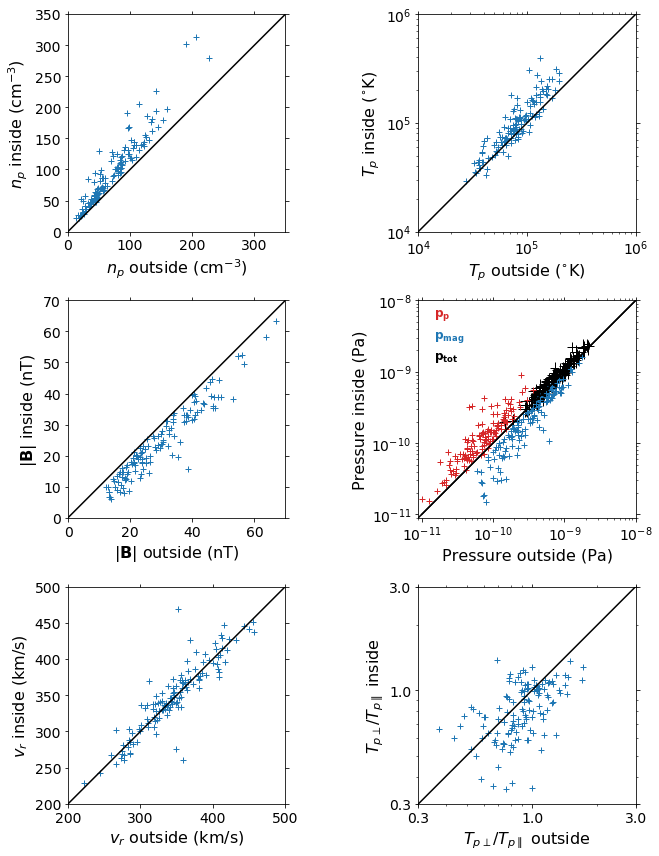

In [5]:
labelsize = 16
# Plot before, during, and after scatterplots
def compare(ax, blob_times, var, lims, **kwargs):
    kwargs['linewidth'] = kwargs.pop('linewidth', 0)
    kwargs['marker'] = kwargs.pop('marker', '+')
    kwargs['ms'] = kwargs.pop('ms', 6)

    # ax.plot(blob_times[var + '_after'], blob_times[var], **kwargs)
    if 'label' in kwargs:
        kwargs['label'] = ""
    ax.plot(blob_times[var + '_outside'], blob_times[var], **kwargs)
    if ((blob_times[var + '_outside'].max() > np.max(lims)) or
       (blob_times[var].max() > np.max(lims)) or
        (blob_times[var + '_outside'].min() < np.min(lims)) or
        (blob_times[var].min() < np.min(lims))):
        raise ValueError('Limits do not contain all data')
    ax.set_xlim(*lims)
    ax.set_ylim(*lims)
    ax.set_aspect(adjustable='box', aspect='equal')
    ax.tick_params(axis='both', which='major', labelsize=labelsize - 2)
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')
    # Plot 1:1 line
    ax.plot(lims, lims, color='k')

fig, axs = plt.subplots(3, 2, figsize=(9, 12), facecolor='w')
titles = ['Proton number density', 'Proton temperature', 'Magnetic field magnitude', 'Pressures']
compare(axs[0, 0], blob_times, 'n_p', (0, 350))
compare(axs[1, 0], blob_times, '|B|', (0, 70))
compare(axs[0, 1], blob_times, 'Tp', (1e4, 1e6))
compare(axs[1, 1], blob_times, 'p_mag', (1e-11, 1e-8), color='C0', label='Magnetic')
compare(axs[1, 1], blob_times, 'p_th', (9e-12, 1e-8), color='C3', label='Proton thermal')
compare(axs[2, 0], blob_times, 'vp_x', (200, 500))
compare(axs[2, 1], blob_times, 'Tani', (0.3, 3))

# Plot total pressure as errorbars
axs[1, 1].errorbar(blob_times['p_tot_ave_outside'], blob_times['p_tot_ave'],
                   xerr=(blob_times['p_tot_ave_outside'] - blob_times['p_tot_min_outside'],
                         blob_times['p_tot_max_outside'] - blob_times['p_tot_ave_outside']),
                   yerr=(blob_times['p_tot_ave'] - blob_times['p_tot_min'],
                         blob_times['p_tot_max'] - blob_times['p_tot_ave']),
                   color='k', linewidth=0, elinewidth=1)
# Set log axis
for ax in (axs[0, 1], axs[1, 1], axs[2, 1]):
    ax.set_xscale('log')
    ax.set_yscale('log')

# Axis labels
axs[0, 0].set_xlabel('$n_{p}$ outside (cm$^{-3}$)', size=labelsize)
axs[0, 0].set_ylabel('$n_{p}$ inside (cm$^{-3}$)', size=labelsize)
axs[0, 1].set_xlabel('$T_{p}$ outside ($^{\circ}$K)', size=labelsize)
axs[0, 1].set_ylabel('$T_{p}$ inside ($^{\circ}$K)', size=labelsize)
axs[1, 0].set_xlabel('$| \mathbf{B} |$ outside (nT)', size=labelsize)
axs[1, 0].set_ylabel('$| \mathbf{B} |$ inside (nT)', size=labelsize)
axs[1, 1].set_xlabel('Pressure outside (Pa)', size=labelsize)
axs[1, 1].set_ylabel('Pressure inside (Pa)', size=labelsize)
axs[2, 0].set_xlabel('$v_{r}$ outside (km/s)', size=labelsize)
axs[2, 0].set_ylabel('$v_{r}$ inside (km/s)', size=labelsize)
axs[2, 1].set_xlabel('$T_{p\perp} / T_{p\parallel}$ outside', size=labelsize)
axs[2, 1].set_ylabel('$T_{p\perp} / T_{p\parallel}$ inside', size=labelsize)

# Pressure axis text
textkwargs = {'size': 12, 'weight': 'bold'}
axs[1, 1].text(1.5e-11, 6e-9, '$\mathbf{p_{p}}$', **textkwargs, color='C3')
axs[1, 1].text(1.5e-11, 3e-9, '$\mathbf{p_{mag}}$', **textkwargs, color='C0')
axs[1, 1].text(1.5e-11, 1.5e-9, '$\mathbf{p_{tot}}$', **textkwargs)

# Format ticks on temperature ansiotropy axis
for axis in (axs[2, 1].xaxis, axs[2, 1].yaxis):
    axis.set_minor_formatter(mticker.NullFormatter())
    axis.set_major_formatter(mticker.ScalarFormatter())
    axis.set_major_locator(mticker.FixedLocator([0.3, 1, 3]))

fig.tight_layout()
fig.subplots_adjust(wspace=0.5)
fig.savefig('scatters.pdf', bbox_inches='tight')

Calculate contours of $I/I_{0}$
---

In [6]:
def IoverI0(dz, dnovern, r0):
    dzoverr0 = (dz / r0).value
    return 1 + 0.66 * dzoverr0 * dnovern

def Mm_to_AU(x):
    return x / AU_Mm

def AU_to_Mm(x):
    return x * AU_Mm

# Grid points over which to sample visibility
sizes_Mm = np.logspace(1, 4, 100)
sizes = sizes_Mm * 1e6 * u.m
dnoverns = np.logspace(-2, 1, 1000)

Calculate $\delta n/n$ and structure size
---

In [7]:
# dn/n
blob_times['n_p_outside'] = (blob_times['n_p_before'] + blob_times['n_p_after']) / 2
blob_times['delta_n_over_n'] = (blob_times['n_p'] / blob_times['n_p_outside']) - 1

# Size
# 1e3 to convert to m, 1e6 to convert to Mm
blob_times['size_Mm'] = blob_times['Duration'] * (blob_times['vp_x'].mean() * 1e3) / 1e6
blob_times['size_frac_err'] = 40.5 / blob_times['Duration']
# Propagate size back to 0.3 AU assuming linear expansion
blob_times['size_Mm_0.3AU'] = blob_times['size_Mm'] * (0.3 / blob_times['r'])

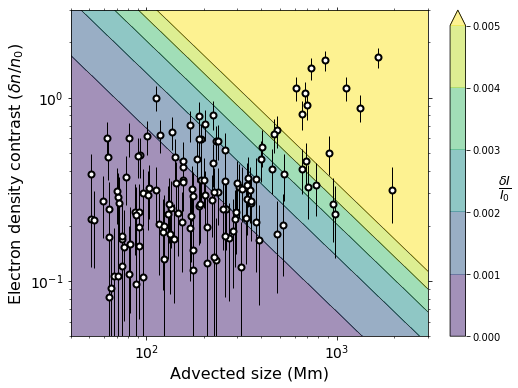

In [8]:
fig, ax = plt.subplots(figsize=(8, 6), facecolor='w')

# Contour plot visibility limits
X, Y = np.meshgrid(sizes_Mm, dnoverns)
Z = IoverI0(X * 1e6 * u.m, Y, 0.3 * const.au)
levels = np.arange(0, 0.0051, 0.001)  # Contour levels to plot
c = ax.contourf(X, Y, Z - 1, levels, alpha=0.5, cmap='viridis', extend='max')
ax.contour(X, Y, Z - 1, levels, linewidths=0.5, colors='k')
cbar = plt.colorbar(c)
cbar.set_label(r'$\frac{\delta I}{I_{0}}$', rotation=0, size=18)

ax.set_xscale('log')
ax.set_yscale('log', nonposy='clip')
fractional_err = 0.08  # Fractional error in e- number density due to alpha abundance uncertainty
ax.errorbar(blob_times['size_Mm_0.3AU'], blob_times['delta_n_over_n'],
            yerr = fractional_err * blob_times['n_p'] / blob_times['n_p_outside'],
            zorder=2, lw=0, elinewidth=1, marker='o', c='w', mew=2, mec='k', ecolor='k')
labelsize = 16
ax.set_xlabel('Advected size (Mm)', size=labelsize)
ax.set_ylabel(r'Electron density contrast ($\delta n/n_{0}$)', size=labelsize)
ax.set_xlim(4e1, 3e3);
ax.set_ylim(bottom=5e-2, top=3);
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.tick_params(axis='both', which='major', labelsize=labelsize - 2)
fig.savefig('size_contrast.pdf', bbox_inches='tight')

Print fraction of blobs that are visible
---

In [9]:
blob_times['visible'] = blob_times['delta_n_over_n'] < (2e-3 * 0.3 * const.au /
                                                        (0.66 * blob_times['size_Mm'].values * 1e6 * u.m)
                                                       ).value
print('Fraction visible: ', np.sum(blob_times['visible']) / blob_times.shape[0])

Fraction visible:  0.7


Print fraction of blobs with Tani < 1
---

In [10]:
print('Temperature anisotropy lower inside: ', ((blob_times['Tani'] / blob_times['Tani_outside']) < 1).sum())
print('Temperature anisotropy higher inside: ', ((blob_times['Tani'] / blob_times['Tani_outside']) > 1).sum())

Temperature anisotropy lower inside:  88
Temperature anisotropy higher inside:  45


In [11]:
print('Mean anisotropy inside: ', blob_times['Tani'].mean(), '±', blob_times['Tani'].std())
print('Mean anisotropy outside: ', blob_times['Tani_outside'].mean(), '±', blob_times['Tani_outside'].std())

Mean anisotropy inside:  0.8343754360053274 ± 0.22848827583611916
Mean anisotropy outside:  0.9223303982711575 ± 0.24562152672534365
